# Calibration of Arduino Controlled Peristaltic Pump

In [1]:
%config IPCompleter.greedy=True
#%matplotlib inline 
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy.optimize as op

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


Define the fitting functions, and include estimates of the y error in the fitting

In [2]:
def linear(x, a, b):
    '''
    Linear function.
    linear(x; a, b) = a*x + b
    '''
    return a * x + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c*x + d

def fit_data(x, y, y_err, f):
    popt, pconv = op.curve_fit(f, x, y, sigma=y_err, absolute_sigma=True)
    perr = np.sqrt(pconv.diagonal())
    print("Parameters:", popt)
    print("Errors:    ", perr)
    return(popt, perr)

# Import calibration data for 5 experimental runs

Dial: value on control potentiometer

PWM - duty cycle in 0 - 255 for DC motor on pump


Values in Run 1 to Run 5 are in g/min

In [3]:
df = pd.read_csv (r'flow_measurements.csv')
df

,Dial,PWM,Run 1,Run 2,Run 3,Run 4,Run 5
0,0.0,210,29.276,30.750,31.311,31.880,32.340
1,0.5,213,32.569,32.906,33.880,34.097,33.997
2,1.0,218,34.444,37.031,36.854,37.268,37.479
3,1.5,222,41.044,41.140,41.052,41.264,41.697
4,2.0,227,42.368,43.372,43.759,43.458,43.476
5,2.5,231,48.790,48.511,48.486,48.824,48.823
6,3.0,235,49.093,50.091,50.013,49.673,51.343
7,3.5,240,56.028,55.395,55.812,55.972,55.943
8,4.0,244,56.519,57.570,57.165,56.925,57.457
9,4.5,249,63.440,63.283,63.025,63.467,62.915


## Plot histograms of each flow rate

<IPython.core.display.Javascript object>


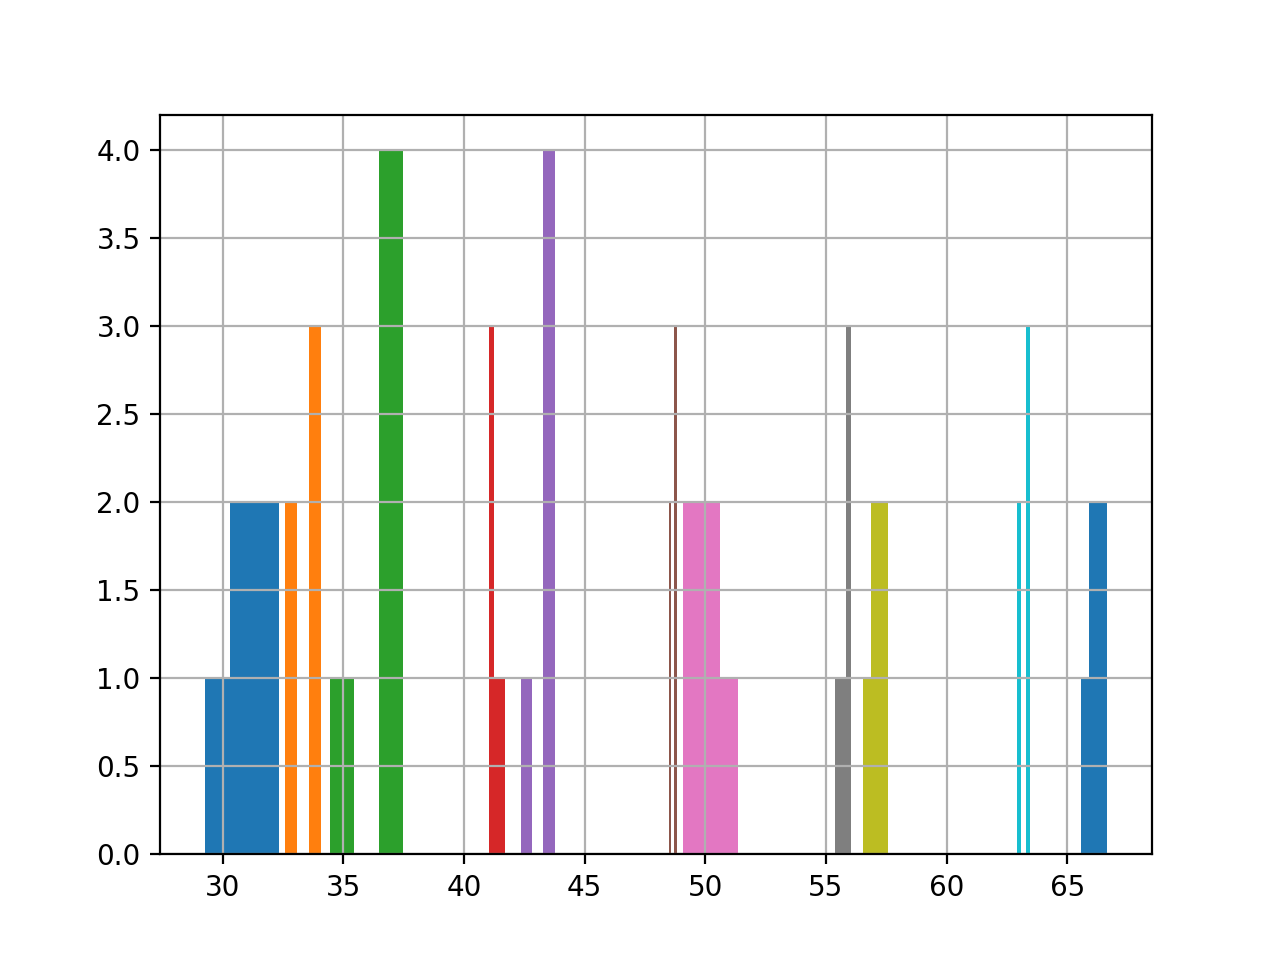

In [6]:
mass_df = df[df.columns[2:7]]

for i in range(len(mass_df)):
    mass_df.iloc[i].hist(bins = 3)
    
    
def calc_mean_std(df, offset = 0):
    mass_df = df[df.columns[2 + offset: 7 ]]
    pwm = df['PWM']
    mass = mass_df.mean(axis=1)
    mass_err = mass_df.std(axis=1)
    return pwm, mass, mass_err

## Fit the data
- Take the mean and standard deviation of runs 2-5
- Then make a polynomial (cubic) fit of the mean value at each pwm setting

In [7]:
def fit_and_plot(df, f=cubic):
    pwm, mass, mass_err =calc_mean_std(df, offset = 1)
    fit_res, fit_err = fit_data(pwm, mass, mass_err, f)
    pwm_fit = np.linspace(210,255)
    mass_fit = np.polyval(fit_res, pwm_fit)

    fig, ax = plt.subplots()
    plt.errorbar(pwm, mass, fmt='.b', label='Data', yerr=mass_err)
    plt.plot(pwm_fit, mass_fit, '-r', label='Fit')
    plt.xlabel(r'PWM')
    plt.ylabel(r'$Q$ (g/min)')
    ax.legend(loc='best', shadow=False)
    # ax.set_aspect(3/4)
    plt.show()


Parameters: [-1.70373460e-04  1.19023534e-01 -2.68600744e+01  2.00133906e+03]
Errors:     [4.72423486e-05 3.30815862e-02 7.71096932e+00 5.98298090e+02]


<IPython.core.display.Javascript object>


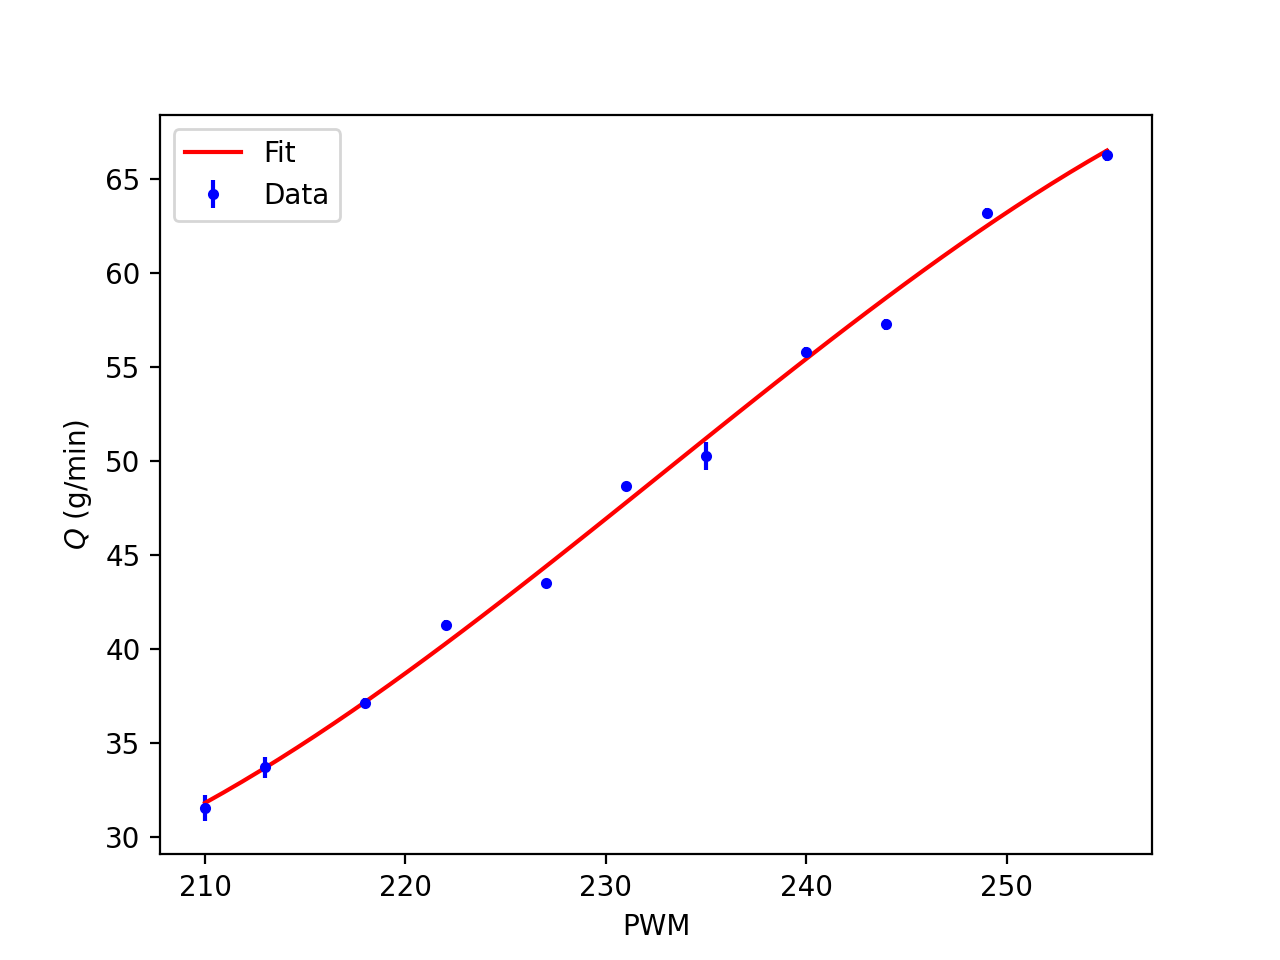

In [8]:
fit_and_plot(df, f=cubic)